/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


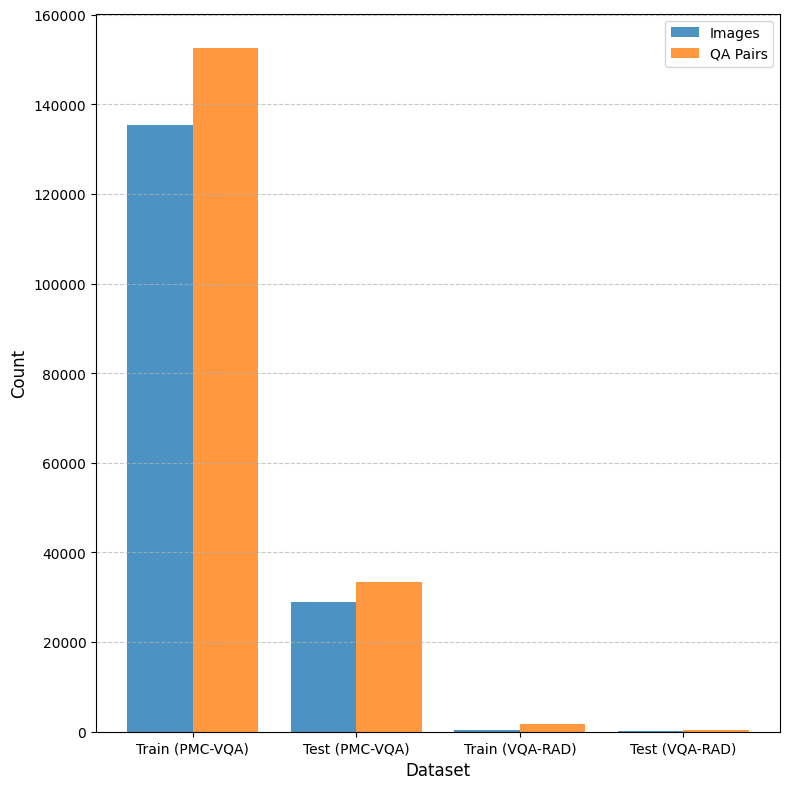

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded CSV files
test_df_path = 'test_2.csv'
train_df_path = 'train_2.csv'

test_df = pd.read_csv(test_df_path)
train_df = pd.read_csv(train_df_path)

train_image_count = train_df['Figure_path'].nunique()
test_image_count = test_df['Figure_path'].nunique()

train_qa_count = train_df.shape[0]
test_qa_count = test_df.shape[0]

# Create a summary DataFrame for visualization
summary_data = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Image Count': [train_image_count, test_image_count],
    'QA Count': [train_qa_count, test_qa_count]
})

VQA = pd.read_excel('VQA_RAD Dataset Public (1).xlsx')
train_subset = VQA[VQA['QID_para'].isin(['freeform', 'para'])]
test_subset = VQA[VQA['QID_para'].isin(['test_freeform', 'test_para'])]

# Count the unique images and QA pairs for train and test subsets in the additional dataset
train_additional_image_count = train_subset['IMAGEID'].nunique()
train_additional_qa_count = train_subset.shape[0]

test_additional_image_count = test_subset['IMAGEID'].nunique()
test_additional_qa_count = test_subset.shape[0]

# Update the bar chart to include data from both datasets
categories = ['Train (PMC-VQA)', 'Test (PMC-VQA)', 'Train (VQA-RAD)', 'Test (VQA-RAD)']
image_counts = [
    train_image_count,
    test_image_count,
    train_additional_image_count,
    test_additional_image_count,
]
qa_counts = [
    train_qa_count,
    test_qa_count,
    train_additional_qa_count,
    test_additional_qa_count]
    

bar_width = 0.4
x_indexes = range(len(categories))


plt.figure(figsize=(8, 8))


plt.bar([x - bar_width / 2 for x in x_indexes], image_counts, width=bar_width, label='Images', alpha=0.8)

# Bars for QA pairs
plt.bar([x + bar_width / 2 for x in x_indexes], qa_counts, width=bar_width, label='QA Pairs', alpha=0.8)

# Add labels and titlesplt.title('Distribution of Images and QA Pairs in Train and Test Sets', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Dataset', fontsize=12)
plt.xticks(ticks=x_indexes, labels=categories)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()